## Analysis

For this analysis I wanted to forgo positive trends in data and rather seek out issues in our dataset and how they are affecting our results, as well as present possible solutions. I am also pointing out how those issues are reflected in our data we gathered, so there will be direct reference to graphs.

### Problems with the Dataset
#### Sampling Bias

If we look at how the data is extracted, we see that we are grabbing random points from across the globe and simply grabbing the nearest city. However this means the vast majority of our data will be from coastal and island cities. In fact, the closest point to Hawaii is actually in Alaska! This means that any point in the 2000 mile radius surround Hawaii will map back to some city in Hawaii meaning in most cases almost every city in Hawaii will be reresented in almost every single random dataset.

This is an issue, particularly in the southern hemisphere where it is currently Summer. Cities on the coast have more temperate weather due to the nearby ocean providing a cooling effect in the summer. Therefore, our temperatures will be generally flattened, which may possibly be the case regardless, but with a clear bias in data it is impossible to tell. The low value in the r value indicating that distance from equator has very little impact on general temperatures is therefore extremely decieving. It is also true that coastal cities tend to have very little or complete cloud cover, relatively high humidities, and greater than average windspeeds affecting all of our data.

#### Solution
I did not implement this in my code due to the obvious extreme effort, but what I would do is separate the data into latitudinal bands (of, for example, ten degrees). Then, for each major landmass we encounter in that band, grab the furthest left left point and furthest right point in that landmass and an equal number of random points from each, adjusted for size of landmass. This would give us a relatively consistent number of cities as we move from the south northward giving us significantly more interior points from the landmasses and removing coastal bias from our data.

#### Seasonal Issues
The northern hemisphere is in the dead of Winter and the global south is in the hottest parts of Summer. The impact, particulary on windspeed, but possibly on other meteorlogical data cannot be overstated. Windspeeds tend to be higher in summer, however other factors are contributing, possibly even negating windspeed created by more direct sunlight. We cannot positively determine anything from a single days data. Similarly, humidity is generally higher in the summer, and that impact may be greater than the distance from the equator making our data largely irrelevant. This isn't even beginning to consider certain geographic locations only having two seasons: wet and dry.

#### Solution
We need to use a rolling average for all statistics over the course of a year to most accurately ascertain how distances from the equator affect wind speed, as well as temperatures and humidity.

#### Land Mass Distribution
The fact of the matter is about two thirds of the world's land mass is in the northern hemisphere. Further, southern landmasses only extend so far downwards. Finally certain latitudinal bands, particularly in the southern hemisphere have a fundamental lack of area from which to gather data. All of this is reflected in our graphs. There is simply two few datapoints from the global south, as our method of grabbing random points from the globe is significantly more likely to grab repeated cities.

#### Solution
There are a few things I would do here: first when comparing the north to the south I would limit my data to consider only cities in the range of -50 to 50 degrees latitude. Second, with the above implementation using latitudinal bands, I would ensure that those bands have equal numbers of cities contained therein and that those points are well distributed across the landmasses. This still has potential issues, but when combined with the solutions above I beleive that our data will be fundamentall more representative.

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import numpy as np
from datetime import date
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [98]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


774

In [99]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [100]:

# set up lists to hold reponse info
response_info = [[],[],[],[],[],[],[],[]]
invalid_cities = []
# Loop through the list of cities and perform a request for data on each
i = 0
j = 1
for city in cities:
    i += 1
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {i} of set {j} | {city}")
        response_info[0].append(response['coord']['lon'])
        response_info[1].append(response['coord']['lat'])
        response_info[2].append(response['main']['temp_max'])
        response_info[3].append(response['main']['humidity'])
        response_info[4].append(response['clouds']['all'])
        response_info[5].append(response['wind']['speed'])
        response_info[6].append(response['sys']['country'])
        response_info[7].append(response['dt'])
    except:
        print("City not found. Skipping...")
    if i >= 50:
        print("sleeping")
        i = 0;
        j += 1;
        time.sleep(60)

Processing Record 1 of set 1 | katsuura
Processing Record 2 of set 1 | puerto ayora
Processing Record 3 of set 1 | ancud
Processing Record 4 of set 1 | barcelos
Processing Record 5 of set 1 | sao jose de ribamar
Processing Record 6 of set 1 | albany
Processing Record 7 of set 1 | busselton
Processing Record 8 of set 1 | salmo
Processing Record 9 of set 1 | ponta delgada
Processing Record 10 of set 1 | fairbanks
Processing Record 11 of set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of set 1 | tautira
Processing Record 13 of set 1 | rikitea
Processing Record 14 of set 1 | bredasdorp
Processing Record 15 of set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of set 1 | gushikawa
Processing Record 17 of set 1 | bambous virieux
Processing Record 18 of set 1 | sistranda
Processing Record 19 of set 1 | guiyang
Processing Record 20 of set 1 | mechanicsville
Processing Record 21 of set 1 | gigmoto
Processing Record 22 of set 1 | komsomolskiy
Processing Recor

Processing Record 37 of set 4 | wasilla
Processing Record 38 of set 4 | butaritari
Processing Record 39 of set 4 | soligalich
Processing Record 40 of set 4 | matagami
Processing Record 41 of set 4 | rocha
Processing Record 42 of set 4 | igarka
Processing Record 43 of set 4 | bull savanna
Processing Record 44 of set 4 | bandarbeyla
Processing Record 45 of set 4 | georgetown
Processing Record 46 of set 4 | sierra vista
Processing Record 47 of set 4 | sertania
Processing Record 48 of set 4 | urubicha
Processing Record 49 of set 4 | luderitz
Processing Record 50 of set 4 | guarapuava
sleeping
Processing Record 1 of set 5 | harper
Processing Record 2 of set 5 | uruacu
Processing Record 3 of set 5 | manaquiri
Processing Record 4 of set 5 | xuchang
Processing Record 5 of set 5 | lasa
Processing Record 6 of set 5 | arman
Processing Record 7 of set 5 | hermanus
Processing Record 8 of set 5 | port elizabeth
Processing Record 9 of set 5 | samusu
City not found. Skipping...
Processing Record 10 of

Processing Record 27 of set 8 | gravdal
Processing Record 28 of set 8 | chabahar
Processing Record 29 of set 8 | waipawa
Processing Record 30 of set 8 | port hedland
Processing Record 31 of set 8 | kilakarai
Processing Record 32 of set 8 | kashary
Processing Record 33 of set 8 | saint simons
Processing Record 34 of set 8 | bara
Processing Record 35 of set 8 | saint combs
City not found. Skipping...
Processing Record 36 of set 8 | inderborskiy
City not found. Skipping...
Processing Record 37 of set 8 | azimur
City not found. Skipping...
Processing Record 38 of set 8 | havoysund
Processing Record 39 of set 8 | londoko
Processing Record 40 of set 8 | porto novo
Processing Record 41 of set 8 | kununurra
Processing Record 42 of set 8 | oranjestad
Processing Record 43 of set 8 | pervomayskiy
Processing Record 44 of set 8 | sarangani
Processing Record 45 of set 8 | tecoanapa
Processing Record 46 of set 8 | pietroasa
Processing Record 47 of set 8 | saldanha
Processing Record 48 of set 8 | arty

Processing Record 9 of set 12 | lufilufi
Processing Record 10 of set 12 | guerrero negro
Processing Record 11 of set 12 | kovdor
Processing Record 12 of set 12 | ngunguru
Processing Record 13 of set 12 | khani
Processing Record 14 of set 12 | andevoranto
City not found. Skipping...
Processing Record 15 of set 12 | carlisle
Processing Record 16 of set 12 | batagay-alyta
Processing Record 17 of set 12 | mantena
Processing Record 18 of set 12 | spas-klepiki
Processing Record 19 of set 12 | emborion
Processing Record 20 of set 12 | swan river
Processing Record 21 of set 12 | beckley
Processing Record 22 of set 12 | quesnel
Processing Record 23 of set 12 | zauralskiy
Processing Record 24 of set 12 | balao
Processing Record 25 of set 12 | nalut
Processing Record 26 of set 12 | ulcinj
Processing Record 27 of set 12 | balkanabat
Processing Record 28 of set 12 | roma
Processing Record 29 of set 12 | bam
Processing Record 30 of set 12 | laguna
Processing Record 31 of set 12 | pyay
Processing Rec

Processing Record 48 of set 15 | tucurui
Processing Record 49 of set 15 | jurado
Processing Record 50 of set 15 | riyadh
sleeping
Processing Record 1 of set 16 | maxixe
Processing Record 2 of set 16 | kalmunai
Processing Record 3 of set 16 | mecca
Processing Record 4 of set 16 | shakiso
Processing Record 5 of set 16 | mahon
Processing Record 6 of set 16 | bellview
Processing Record 7 of set 16 | dakar
Processing Record 8 of set 16 | tazovskiy
Processing Record 9 of set 16 | westport
Processing Record 10 of set 16 | lamu
Processing Record 11 of set 16 | hope
Processing Record 12 of set 16 | deh rawud
City not found. Skipping...
Processing Record 13 of set 16 | ekibastuz
Processing Record 14 of set 16 | brookings
Processing Record 15 of set 16 | tura
Processing Record 16 of set 16 | mountain home
Processing Record 17 of set 16 | taltal
Processing Record 18 of set 16 | pinega
Processing Record 19 of set 16 | ayagoz
Processing Record 20 of set 16 | ribas do rio pardo
Processing Record 21 o

In [101]:
df = pd.DataFrame(list(zip(cities, *response_info)), \
                        columns = ['City', 'Longitude', 'Latitude', 'Max Temperature', 
                                   'Humidity', 'Cloudiness', 'Wind Speed','Country','Date Time']) \
                        .set_index('City')
df.to_csv(output_data_file)
len(df)

711

In [102]:
def makescatter(col1, col2, unit):
    x=df[col1]
    y=df[col2]
    plt.title(f"{col1} vs {col2} ({date.today()})")
    plt.xlabel(f"{col1}")
    plt.ylabel(f"{col2} ({unit})")
    plt.scatter(x,y)
    plt.savefig(f"output_data/{col1}_{col2.replace(' ','')}.png")
    plt.show()
    return

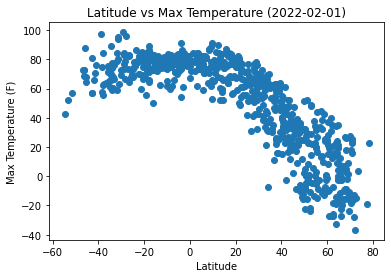

In [103]:
makescatter('Latitude','Max Temperature','F')

A scatter plot of the maximum temperature in a 24 period as we increase latitude. Data for this and the following three charts taken from cities randomly from both northern and southern hemisphere. Data peaks at equator (latitude 0) and trends down, though more quickly for Northern Hemisphere. Note that there are relatively few cities lower than latitude -40.

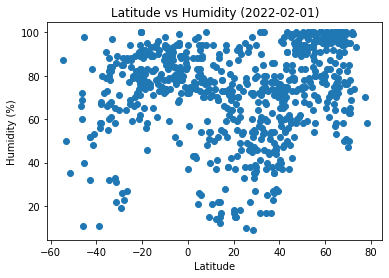

In [104]:
makescatter('Latitude','Humidity','%')

A scatter plot of the same cities current humidity as we increase latitude. Humidity of of cities above latitude 60 is extremely high. We lack this information for southern hemisphere

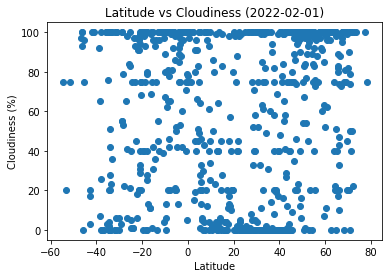

In [105]:
makescatter('Latitude','Cloudiness','%')

A scatter plot of the same cities percentage of cloud cover as we increase latitude. Cloud cover represents percent of sky obscured by clouds. Measurement tends to be 100 or 0.

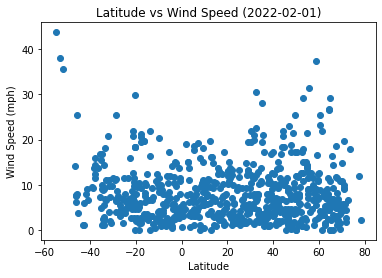

In [106]:
makescatter('Latitude','Wind Speed','mph')

A scatter plot of the same cities wind speed in miles per hour as we increase latitude. Low windspeeds are extremely common, becomes significantly more scarce for higher values. Possibly logarithmic though this requires more analysis.

In [107]:
def makescatterpair(col1, col2, unit):
    x1, y1 = neglat[col1], neglat[col2]
    x2, y2 = poslat[col1], poslat[col2]
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
    slope1, intercept1, r1, _, _ = linregress(x1,y1)
    slope2, intercept2, r2, _, _ = linregress(x2,y2)
    ax1.scatter(x1,y1)
    line1, = ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
    line1.set_label(f'r-squared: {round(r1**2, 3)}')
    ax1.legend()
    ax2.scatter(x2,y2)
    line2, = ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
    line2.set_label(f'r-squared: {round(r2**2, 3)}')
    ax2.legend()
    ax1.set_title('Cities Below Equator')
    ax2.set_title('Cities Above or At Equator')
    ax1.set_xlabel(col1)
    ax2.set_xlabel(col1)
    ax1.set_ylabel(f"{col2} ({unit})")
    ax2.set_ylabel(f"{col2} ({unit})")
    fig.suptitle(f"Linear Regression of {col1} vs {col2} ({date.today()})")
    plt.savefig(f"output_data/NvS_{col1}_{col2.replace(' ','')}.png")
    return

neglat = df.loc[df['Latitude'] < 0]
poslat = df.loc[df['Latitude'] >= 0]

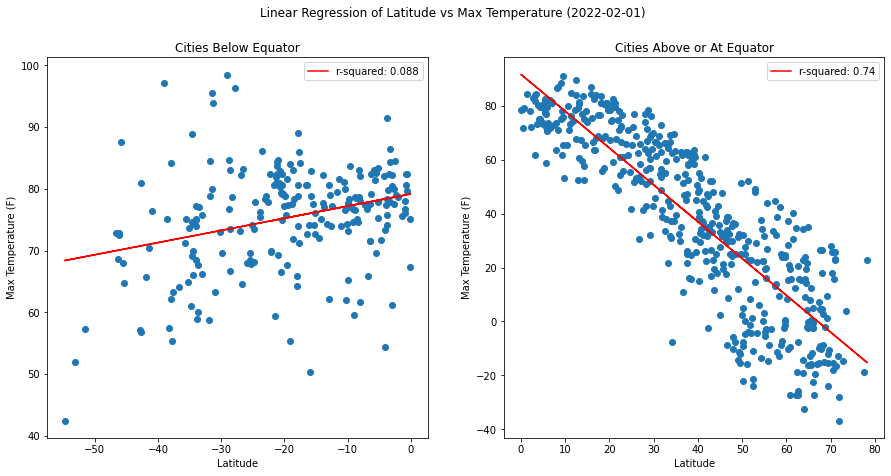

In [108]:
makescatterpair('Latitude', 'Max Temperature', 'F')

For the final graphs, we have separated the preceding graphs into southern and northern hemispheres and plotted linear regressions (r values represented in legends). This helps us observe trends as we approach the equator (left graph, southern hemisphere) and as we move away from the equator (right graph, northern hemisphere). We have separated Strong downwards trend represented for cities above equator with extremely high r value which is not reflected in southern hemisphere. Possibly due to seasonal difference, and possibly due to general geography. Would need to redo analysis in 6 months to more accurately describe. 

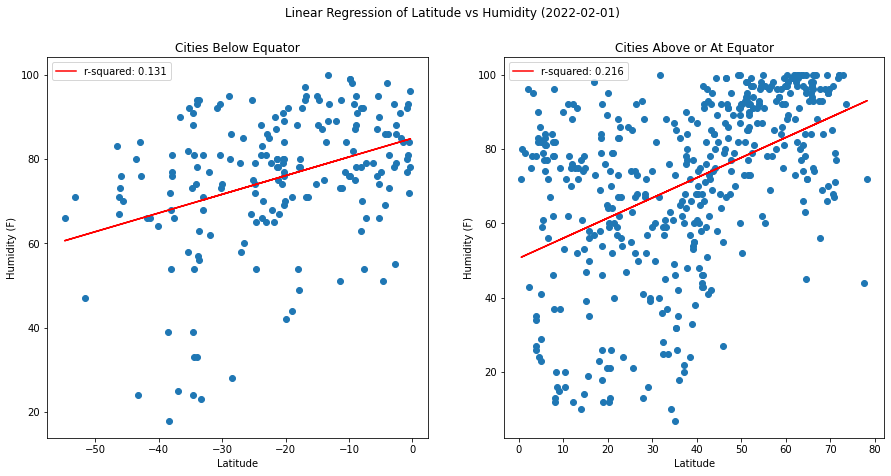

In [94]:
makescatterpair('Latitude', 'Humidity', 'F')

Humidity for southern hemisphere increases as we move towards equator and humidity for northern hemisphere increases as we move away from equator. Possibly due to very random nature of humidity, however we see for northern most cities they have consistently high humidities. It is possible the trend is similar for southern hemisphere but we lack the data as landmasses do not dip that low.

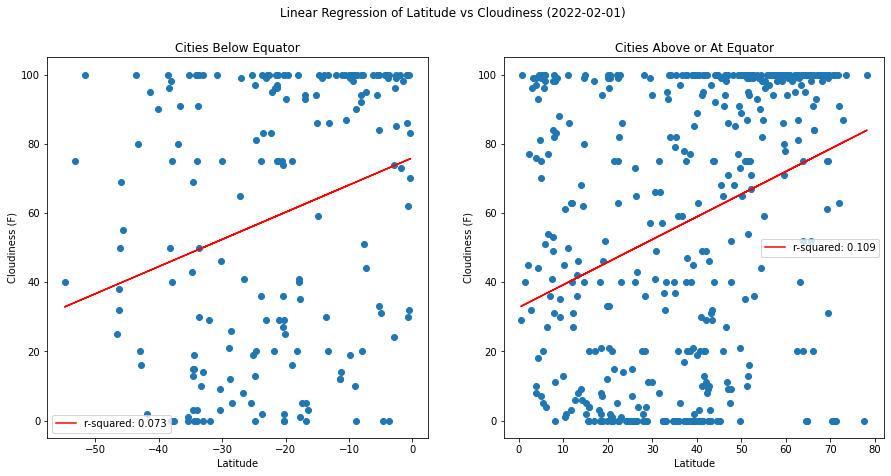

In [95]:
makescatterpair('Latitude', 'Cloudiness', 'F')

Almost no correlation in either case, though we once again notice that northern most cities ten to have high cloud cover (as reflected in global pictures. We again lack that data for southern cities.

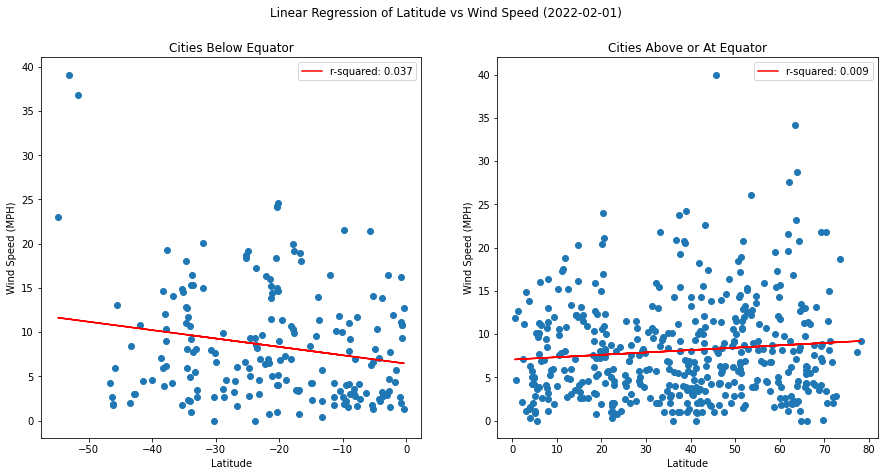

In [96]:
makescatterpair('Latitude', 'Wind Speed', 'MPH')

Again no correlation present for windspeeds as we approach equator. The only data of note is that abnormally high windspeeds (>25 mph) are almost exclusive to latitudes greater 50 less than -50 degrees latitude.